# Part 3

In [13]:
circuit = QuantumCircuit(3,3)
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

circuit.barrier() # just a visual aid

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1) #header mark gate
circuit.cx(1,2) #control x gate

circuit.barrier() # just a visual aid

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

circuit.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])

In [15]:
%matplotlib inline
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘ ░            ░  ║  ║  ░ └───┘   └╥┘
c: 3/═══════════════════════════════════╩══╩═════════════╩═
                                        0  1             2

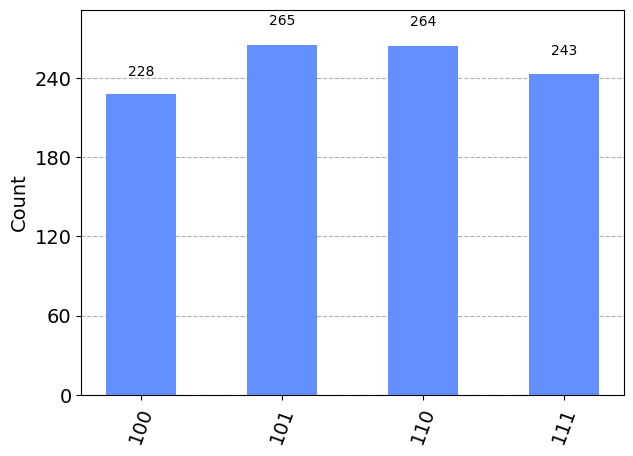

In [18]:
#And finally, let's simulate the circuit on Aer's qasm_simulator

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000).result() # to get results we use dot result
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [20]:
counts=result.get_counts()
print(counts)

{'100': 228, '101': 265, '110': 264, '111': 243}
